In [1]:
# Practico Data Drive - Exploración y Curación de Datos Autor: Grupo 7
#Participantes: Montarce, Omonte y Cantero

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
# Importación de libre pertinentes
import matplotlib.pyplot as plt
import matplotlib.font_manager
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import warnings
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')


# MODELADO
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn import metrics



%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

## Carga de los DataSets

In [9]:
# cargar con pandas el archivo .csv , names=m_cols , encoding='latin-1' utf-8
df = pd.read_csv('SUELDO412.csv',sep=";", encoding='latin-1')

In [10]:
## Valido el tamañao del Data set de clientes

print("Shape 'df'   = {}".format(df.shape))
df.sample(10)

Shape 'df'   = (149129, 60)


,CUITCLIE,APEYNOMB,RELACION,GRUPOGENERAL,SUBGRUPO,SEGMENTO_SUELDOS,CL_ACTIVO_FUM,TIENE_I_CBESA,LIMC_Q900,TIENE_I_VISA,...,"IMPORTE ANUALIZADO TC RENOV + MANT (PAQUETE O NO), POBLACION TOTAL CON AL MENOS 1 TC","IMPORTE ANUALIZADO TC RENOV + MANT (PAQUETE O NO), SOLO LOS QUE PAGAN","VALOR ANUALIZADO RENOVACION TC (PAQUE O NO PAQUE), POBLACION TOTAL CON AL MENOS 1 TC","VALOR ANUALIZADO RENOVACION TC (PAQUE O NO PAQUE), SOLO POBLACION CON TC","VALOR ANUALIZADO MANTENIMIENTO TC (PAQUE O NO PAQUE), POBLACION TOTAL CON AL MENOS 1 TC","VALOR ANUALIZADO MANTENIMIENTO TC (PAQUE O NO PAQUE), SOLO POBLACION CON TC",USA TC,TIENE TC EN COMPLEMENTARIA TC,FORMULA TABLA COMPLEMENTRIA,FORMULA TABLA COMPLEMENTRIA _1
78083,27038001510,ACTIS DATO CARMEN,TIT,Individuo sin actividad comercial,Sueldo,1,1,1,0,0,...,"95788,42975","95788,42975","7841,322314","7841,322314","87947,10744","87947,10744",0,0,NaN,NaN
106658,27202248735,SILVA CLYDES BERSABE,TIT,Individuo sin actividad comercial,Sueldo,6,SI,1,0,1,...,"215166,9421","215166,9421","39272,72727","39272,72727","175894,2149","175894,2149",0,0,NaN,NaN
90427,27120439923,AGUERO MERCEDES SUSANA,TIT,Individuo sin actividad comercial,Sueldo,1,SI,1,0,1,...,"175894,2149","175894,2149","0,000002","0,000002","175894,2149","175894,2149",1,1,NaN,NaN
147378,27396939067,DE LA SILVA AYLEN,TIT,Individuo sin actividad comercial,Sueldo,6,SI,1,0,1,...,"191576,8595","191576,8595","15682,64463","15682,64463","175894,2149","175894,2149",1,1,NaN,NaN
111622,27220195657,SOSA SILVIA LEONOR,TIT,Individuo sin actividad comercial,Sueldo,6,1,1,0,0,...,"95788,42975","95788,42975","7841,322314","7841,322314","87947,10744","87947,10744",0,0,NaN,NaN
81770,27052604171,SOSA REMIGIA FELICIANA,TIT,Individuo sin actividad comercial,Sueldo,1,SI,1,0,1,...,"175894,2149","175894,2149","0,000002","0,000002","175894,2149","175894,2149",1,1,NaN,NaN
58053,20396227429,BARRIONUEVO FEDERICO MANUEL,TIT,Individuo sin actividad comercial,Sueldo,6,SI,1,0,0,...,"95788,42975","95788,42975","7841,322314","7841,322314","87947,10744","87947,10744",1,1,NaN,NaN
109379,27213914818,GALINDEZ GRACIELA,TIT,Individuo sin actividad comercial,Sueldo,4,SI,1,0,0,...,"95788,42975","95788,42975","7841,322314","7841,322314","87947,10744","87947,10744",1,1,NaN,NaN
140009,27341304488,TORRES IVANA SABRINA,TIT,Individuo sin actividad comercial,Sueldo,6,SI,1,0,0,...,"95788,42975","95788,42975","7841,322314","7841,322314","87947,10744","87947,10744",1,1,NaN,NaN
119448,27249433905,FANIN MARIA JOSE,TIT,Individuo sin actividad comercial,Sueldo,3,1,1,0,0,...,"95788,42975","95788,42975","7841,322314","7841,322314","87947,10744","87947,10744",0,0,NaN,NaN


In [11]:
## Exploro el Dataset
df.dtypes

CUITCLIE                                                                                       int64
APEYNOMB                                                                                      object
RELACION                                                                                      object
GRUPOGENERAL                                                                                  object
SUBGRUPO                                                                                      object
SEGMENTO_SUELDOS                                                                               int64
CL_ACTIVO_FUM                                                                                 object
TIENE_I_CBESA                                                                                  int64
LIMC_Q900                                                                                      int64
TIENE_I_VISA                                                                               

# Curaduría de Datos

In [12]:
# Saco Caracteres Especiales
df.columns[~df.columns.str.match(r'^(\w+)$')]

Index([' PRECA A NUMERO ', ' SUMA SALDO PROMEDIO (CA + CC) MES ACTUAL ',
       ' SALDO PROMEDIO (CA + CC) MES 1 ', ' SALDO PROMEDIO (CA + CC) MES 2 ',
       ' PROMEDIO TRIMESTRE SALDO CA + CC ',
       ' PROMEDIO TRIMESTRE SALDO TOTAL ', ' PROMEDIO BIMESTRE SALDO CA + CC ',
       ' PROMEDIO BIMESTRE SALDO TOTAL ', ' QTC ', ' Tipo de paquete ',
       ' Clientes sin paquete y Con PP ', ' Clientes sin paquete y Con TC ',
       ' Clientes sin paquete y Con PP Y TC ',
       ' Clientes sin paquete y Con TC y PP (numero) ',
       ' Clientes sin paquete CON PP SIN TC ',
       ' Clientes sin paquete sin PP con TC ',
       ' Clientes SIN PAQUETE, SIN TC, SIN PP ',
       ' Clientes SIN PAQUETE, SIN TC, SIN PP, CON PRECA ',
       ' Clientes SIN PAQUETE, SIN TC, SIN PP, SIN PRECA ',
       ' POBLACION PAQUETIZADA ',
       ' POBLACION PAQUETIZABLE (NO PAQUETIZADA. CON PRECA/TC/PP) ',
       ' TIENE ALGUNA TC EN ESTA BD ',
       ' POBLACION PAQUETIZADA O PAQUETIZABLE ',
       ' VALOR PA

In [13]:
#Convierto los valores Cualitativos en Cuantitativos  COMO LOS NOMBRES DE LOS PAQUETES Y LOS NULOS A CERO

df.replace({'TIPO_PAQ_DESC' : 'Especial Jubilados'}, 1, inplace=True)
df.replace({'TIPO_PAQ_DESC' : 'Preferencial'}, 2, inplace=True)
df.replace({'TIPO_PAQ_DESC' : 'Especial'}, 3, inplace=True)
df.replace({'TIPO_PAQ_DESC' : 'Esencial'}, 4, inplace=True)
df.replace({'TIPO_PAQ_DESC' : 'Premium'}, 5, inplace=True)
df.replace({'TIPO_PAQ_DESC' : 'Regional'}, 6, inplace=True)
df.replace({'TIPO_PAQ_DESC' : 'Inicial'}, 7, inplace=True)
df['TIPO_PAQ_DESC']=df['TIPO_PAQ_DESC'].fillna(0)

#Cambio el tipo de campo a numerico
df['TIPO_PAQ_DESC'] = pd.to_numeric(df['TIPO_PAQ_DESC'],errors='coerce')
df['TIPO_PAQ_DESC'] = df['TIPO_PAQ_DESC'].astype(float)

print(df['TIPO_PAQ_DESC'])

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
149124    0.0
149125    4.0
149126    0.0
149127    0.0
149128    0.0
Name: TIPO_PAQ_DESC, Length: 149129, dtype: float64


In [14]:
# Reemplazamos los valores fuera de "a-Z, 0-9 y _" en el dataset
df.columns = df.columns.str.replace(' ', '_')
df.head()

,CUITCLIE,APEYNOMB,RELACION,GRUPOGENERAL,SUBGRUPO,SEGMENTO_SUELDOS,CL_ACTIVO_FUM,TIENE_I_CBESA,LIMC_Q900,TIENE_I_VISA,...,"_IMPORTE_ANUALIZADO_TC_RENOV_+_MANT_(PAQUETE_O_NO),_POBLACION_TOTAL_CON_AL_MENOS_1_TC_","_IMPORTE_ANUALIZADO_TC_RENOV_+_MANT_(PAQUETE_O_NO),_SOLO_LOS_QUE_PAGAN_","_VALOR_ANUALIZADO_RENOVACION_TC_(PAQUE_O_NO_PAQUE),_POBLACION_TOTAL_CON_AL_MENOS_1_TC_","_VALOR_ANUALIZADO_RENOVACION_TC_(PAQUE_O_NO_PAQUE),_SOLO_POBLACION_CON_TC_","_VALOR_ANUALIZADO_MANTENIMIENTO_TC_(PAQUE_O_NO_PAQUE),_POBLACION_TOTAL_CON_AL_MENOS_1_TC_","_VALOR_ANUALIZADO_MANTENIMIENTO_TC_(PAQUE_O_NO_PAQUE),_SOLO_POBLACION_CON_TC_",_USA_TC_,_TIENE_TC_EN_COMPLEMENTARIA_TC_,_FORMULA_TABLA_COMPLEMENTRIA_,_FORMULA_TABLA_COMPLEMENTRIA__1
0,20005715491,FAVA ANDRES TOMAS,TIT,Individuo sin actividad comercial,Sueldo,2,1,1,0,0,...,"95788,42975","95788,42975","7841,322314","7841,322314","87947,10744","87947,10744",1,1,1.0,1.0
1,20005809933,ARGUELLO CIPRIANO,TIT,Individuo sin actividad comercial,Sueldo,3,1,1,0,0,...,"95788,42975","95788,42975","7841,322314","7841,322314","87947,10744","87947,10744",1,1,NaN,NaN
2,20006161406,MARTINO DALIS MARIA,TIT,Individuo sin actividad comercial,Sueldo,2,1,0,0,0,...,"95788,42975",0,"7841,322314",0,"87947,10744",0,0,0,NaN,NaN
3,20018225825,FERNANDEZ ANGEL FLORENTINO,TIT,Individuo sin actividad comercial,Sueldo,1,1,0,0,0,...,"95788,42975",0,"7841,322314",0,"87947,10744",0,0,0,NaN,NaN
4,20027894969,AMAYA MARCELO,TIT,Individuo sin actividad comercial,Sueldo,2,1,0,0,0,...,"95788,42975",0,"7841,322314",0,"87947,10744",0,0,0,NaN,NaN


In [15]:
# Eliminamos columnas calculadas
df = df.drop(df.columns[[26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57]], axis='columns')
print("Shape 'df'   = {}".format(df.shape))
df.sample(5)

Shape 'df'   = (149129, 28)


,CUITCLIE,APEYNOMB,RELACION,GRUPOGENERAL,SUBGRUPO,SEGMENTO_SUELDOS,CL_ACTIVO_FUM,TIENE_I_CBESA,LIMC_Q900,TIENE_I_VISA,...,SALDO_COMPUTO_SIST_2,SALDO_COMPUTO_SIST_21,SALDO_COMPUTO_SIST_22,SALDO_COMPUTO_SIST_FCI,SALDO_COMPUTO_SIST_FCI1,SALDO_COMPUTO_SIST_FCI2,Ingresos,SEGMENTO,_FORMULA_TABLA_COMPLEMENTRIA_,_FORMULA_TABLA_COMPLEMENTRIA__1
114834,27231974909,BRANDOLINI MARIA DANIELA,TIT,Individuo sin actividad comercial,Sueldo,6,1,0,312000,0,...,0,0,0,0,0,0,127092,4,NaN,NaN
139452,27338077810,TASSISTO MARIA GIMENA,TIT,Individuo sin actividad comercial,Sueldo,6,1,1,0,0,...,0,0,0,0,0,0,181595,4,NaN,NaN
115893,27235446494,ORELLANA MARIA LAURA,TIT,Individuo sin actividad comercial,Sueldo,6,SI,0,0,0,...,0,0,0,0,0,0,213594,4,NaN,NaN
59167,20406810616,ANDRADA CARLOS GUSTAVO,TIT,Individuo sin actividad comercial,Sueldo,6,SI,1,0,0,...,0,0,0,0,0,0,195921,4,NaN,NaN
44554,20320723877,CALVO LUCAS ANDRES,TIT,Individuo sin actividad comercial,Sueldo,3,SI,0,0,0,...,0,0,0,0,0,0,122744,4,NaN,NaN


In [16]:
## Elimino valores nulos
df = df.dropna(subset=['CUITCLIE'])
df.describe()

,CUITCLIE,SEGMENTO_SUELDOS,TIENE_I_CBESA,LIMC_Q900,TIENE_I_VISA,TIPO_PAQ_DESC,TIENE_I_PR_PERS,SALDO_COMPUTO_SIST_CC_P,SALDO_COMPUTO_SIST_CC_P1,SALDO_COMPUTO_SIST_CC_P2,SALDO_COMPUTO_SIST_FCI,SALDO_COMPUTO_SIST_FCI1,SALDO_COMPUTO_SIST_FCI2,Ingresos,SEGMENTO,_FORMULA_TABLA_COMPLEMENTRIA_,_FORMULA_TABLA_COMPLEMENTRIA__1
count,1.491290e+05,149129.000000,149129.000000,1.491290e+05,149129.000000,149129.000000,149129.000000,149129.0,149129.000000,149129.000000,1.491290e+05,1.491290e+05,1.491290e+05,149129.000000,149129.0,1.0,1.0
mean,2.398459e+10,4.217322,0.776911,3.382383e+04,0.283788,0.967552,0.334315,0.0,3.575649,4.033562,1.498872e+03,1.345685e+03,1.218004e+03,165444.584346,4.0,1.0,1.0
std,3.313529e+09,1.926601,0.416319,1.167020e+05,0.450837,1.439073,0.471752,0.0,901.578898,745.569598,8.397775e+04,7.856805e+04,7.605030e+04,32241.491539,0.0,NaN,NaN
min,2.000572e+10,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,115800.000000,4.0,1.0,1.0
25%,2.028654e+10,2.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,136758.000000,4.0,1.0,1.0
50%,2.393395e+10,4.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,163440.000000,4.0,1.0,1.0
75%,2.722079e+10,6.000000,1.000000,0.000000e+00,1.000000,2.000000,1.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,190608.000000,4.0,1.0,1.0
max,2.796110e+10,8.000000,1.000000,1.645000e+06,1.000000,7.000000,1.000000,0.0,328379.000000,212436.000000,2.468633e+07,2.362834e+07,2.244674e+07,231599.000000,4.0,1.0,1.0


In [17]:
###Tenemos el conjunto de datos en forma de matriz numpy
# Cada fila representa una instancia y cada columna una característica

datos = np.array(df[['Ingresos']])

# Crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajusta el escalador a los datos y transforma los datos
ingresos_normalizados = scaler.fit_transform(datos[:, -1].reshape(-1, 1))

# Los datos normalizados estarán en el rango [0, 1]
print(ingresos_normalizados)

[[0.70422024]
 [0.28128049]
 [0.50309588]
 ...
 [0.4082246 ]
 [0.05228024]

SyntaxError: '[' was never closed (753491418.py, line 15)

In [18]:
import numpy as np

# Tenemos un conjunto de datos en forma de matriz numpy
# Cada fila representa una instancia y cada columna una característica, incluyendo Ingresos

datos = np.array(df[['Ingresos']])

# Extrae la columna "Ingresos" de los datos
ingresos = datos[:; 0]

# Define el peso para la variable "Ingresos" al 60%
peso_ingresos = 0.6

# Calcula la ponderación de la variable "Ingresos"
ponderacion_ingresos = ingresos * peso_ingresos

# Imprime la ponderación de la variable "Ingresos"
print(ponderacion_ingresos)

[118408.8  89023.2 104434.8 ...  97843.2  73112.4  87091.8]


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3721399733.py, line 20)

# Realizo Estadistica descriptiva de como está hoy la segmentación

In [19]:
# Reviso el universo actual del Producto para el Cliente Bancor Mercado Cerrado Cápita
pd.DataFrame(df.TIPO_PAQ_DESC.value_counts())

,TIPO_PAQ_DESC
0.0,96723
2.0,21129
4.0,15854
3.0,11295
1.0,4015
7.0,53
6.0,45
5.0,15


<Axes: xlabel='SEGMENTO_SUELDOS', ylabel='TIENE_I_CBESA'>

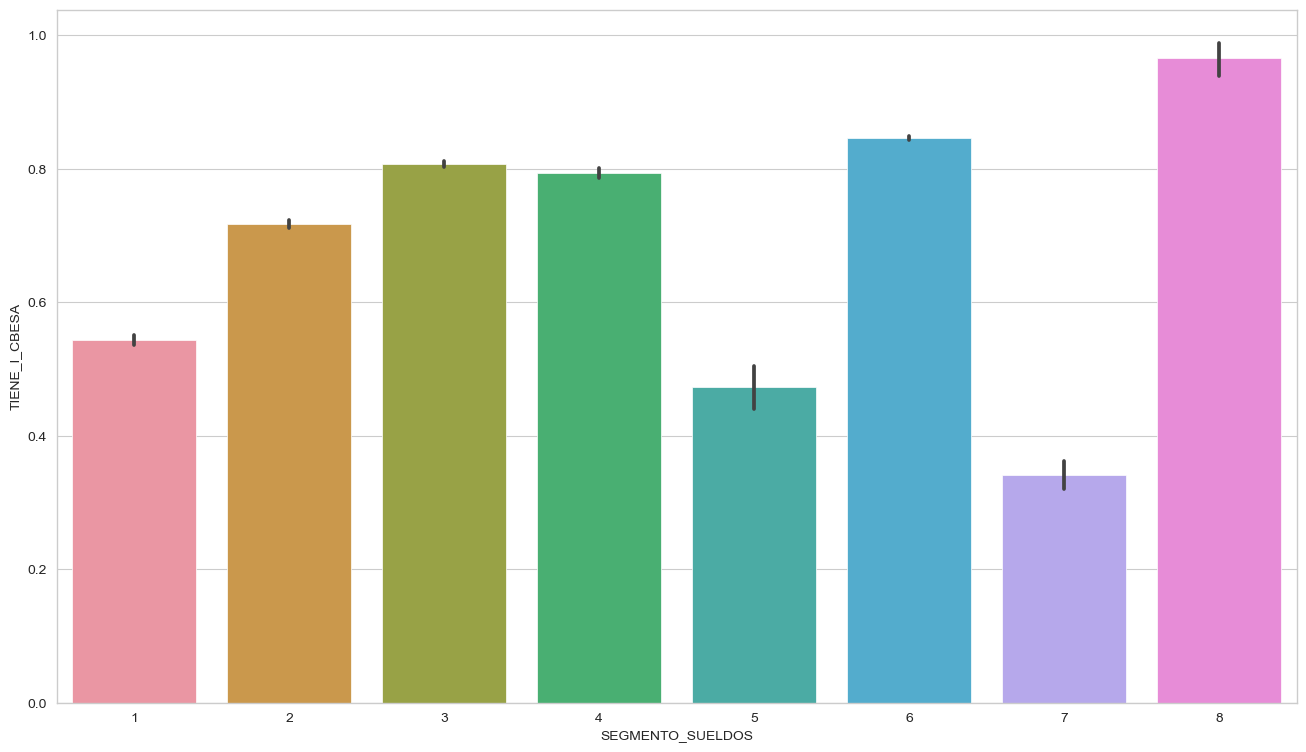

In [20]:
# Realizo Gráfico de Barras Sub Segementación de los Clientes Bancor Mercado Cerrado Cápita vs TC (Producto Core para Paquetizar)
sns.barplot(data=df, x='SEGMENTO_SUELDOS', y='TIENE_I_CBESA')

# Graficamos con más variables para ver las relaciones del Universo que estamos trabajando


In [21]:
# Agrego más variables y comienzo a utilizar los gráficos
# 'Graficamos la relación entre Campos Importantes como ser: Tiene Paquetes, Tiene Tarjeta de Crédito Visa y Cordobesa, Tiene Préstamo y Su sueldo'
df_Ingresos_list = df.Ingresos.tolist()
print('Reducimos la Base a 5 Campos: Tiene Cordobesa, Tiene Visa, Tiene Préstamos, Tiene Paquete e Ingresos')
df = df[['TIPO_PAQ_DESC','TIENE_I_PR_PERS','TIENE_I_CBESA','TIENE_I_VISA','Ingresos']]

Reducimos la Base a 5 Campos: Tiene Cordobesa, Tiene Visa, Tiene Préstamos, Tiene Paquete e Ingresos


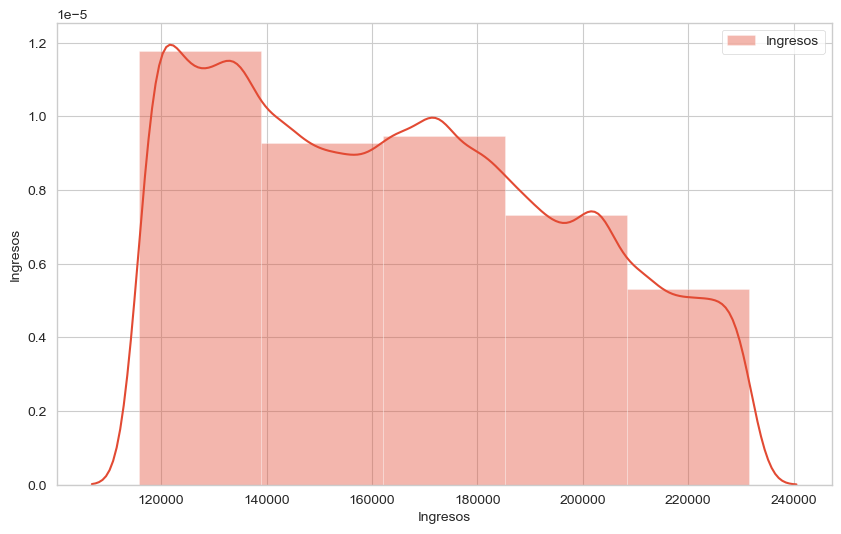

In [22]:

## Grafico la distribucion de Ingresos del Cliente Capita Mercado Cerrado"
plt.figure(figsize=(10,6))
sns.distplot(df.Ingresos, kde=True, bins=5, label='Ingresos')

plt.ylabel('Ingresos')
plt.legend()

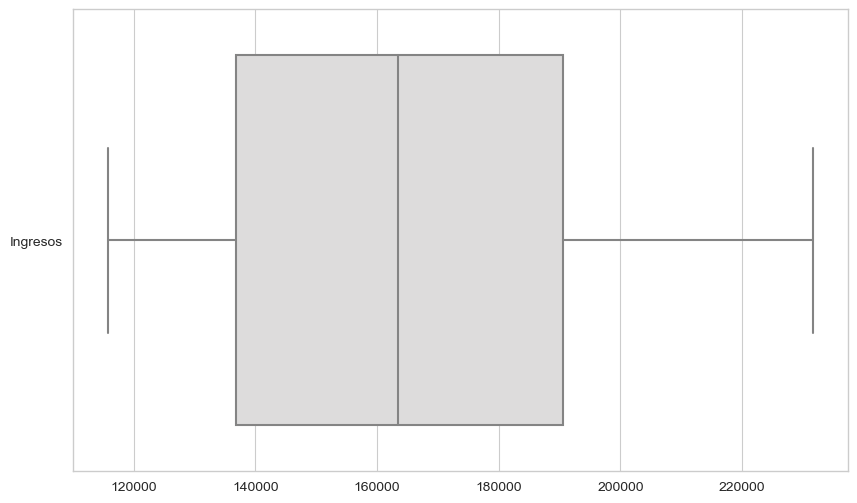

In [23]:
# Visualizamos los valores atipicos para el calculo realizado de Ingresos por medio de un gráfico
#Para observar valores atípicos visualizamos el gráfico de caja...
plt.figure(figsize=(10,6))
data = df[['Ingresos']]
sns.boxplot(data = data, orient="h", palette="coolwarm")
#sns.stripplot(data=data, color='black')
plt.show()


In [24]:
# Visualizamos los valores Ingresos y relacionado con Tiene Paquetes y Tiene cordobesa por medio de un gráfico
print("Columna:",df.groupby('SUBGRUPO').size())
df.dtypes
sns.pairplot(df.dropna(), hue='CUITCLIE',size=3,vars=["TIPO_PAQ_DESC","TIENE_I_CBESA","Ingresos"],kind='scatter')


KeyError: 'SUBGRUPO'

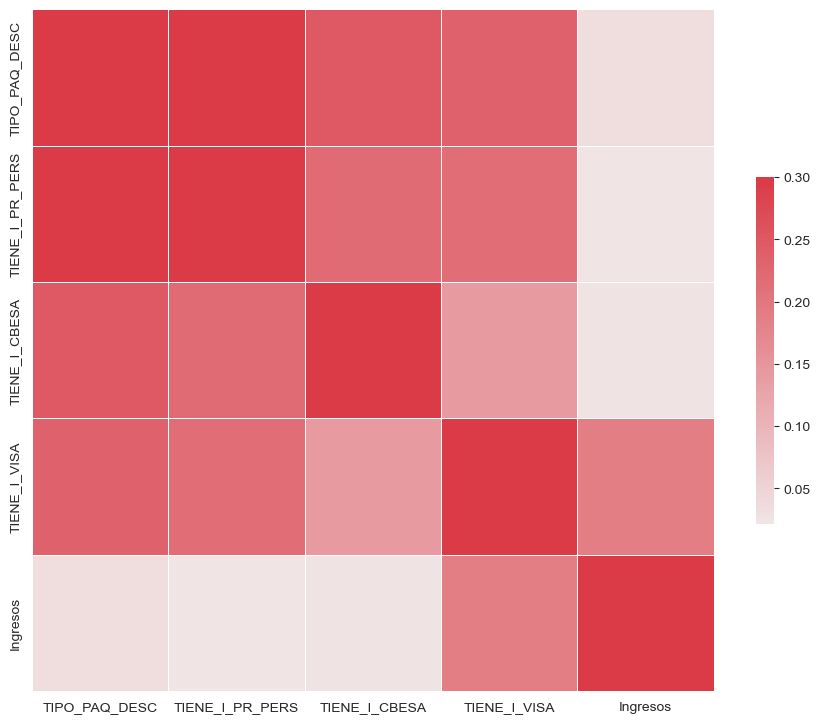

In [25]:
# Agrego más variables y comienzo a utilizar los gráficos
# 'Graficamos la relación entre Campos Importantes como ser: Tiene PAquetes, Tiene Tarjeta de Crédito Visa y Cordobesa, Tiene Préstamo y Su sueldo'
def plot_corr(df):
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(200, 10, as_cmap=True)
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

plot_corr(df)

In [26]:
# Utilizo Kmeans para desarrollar clusters - Cantidad 4
kmeans=KMeans(n_clusters=4).fit(df)
print(kmeans)
print('Suma : ', kmeans.inertia_)

KMeans(n_clusters=4)
Suma :  10380111550955.902


In [27]:
##'Mostramos las coordenadas de los centroides'
centroids = kmeans.cluster_centers_
print(centroids)

### 'MOSTRAMOS EL CONTEO POR CLUSTER'
pd.DataFrame(pd.DataFrame(labels, columns = ['cluster']).cluster.value_counts())

[[1.06593436e+00 3.62652451e-01 7.93177719e-01 3.48167892e-01
  1.82405099e+05]
 [8.49112821e-01 3.00996131e-01 7.54658247e-01 1.79214657e-01
  1.28317040e+05]
 [9.44546195e-01 3.17901235e-01 7.77438611e-01 3.94179894e-01
  2.13524693e+05]
 [1.03019079e+00 3.59091878e-01 7.87065658e-01 2.58660200e-01
  1.55377858e+05]]


NameError: name 'labels' is not defined

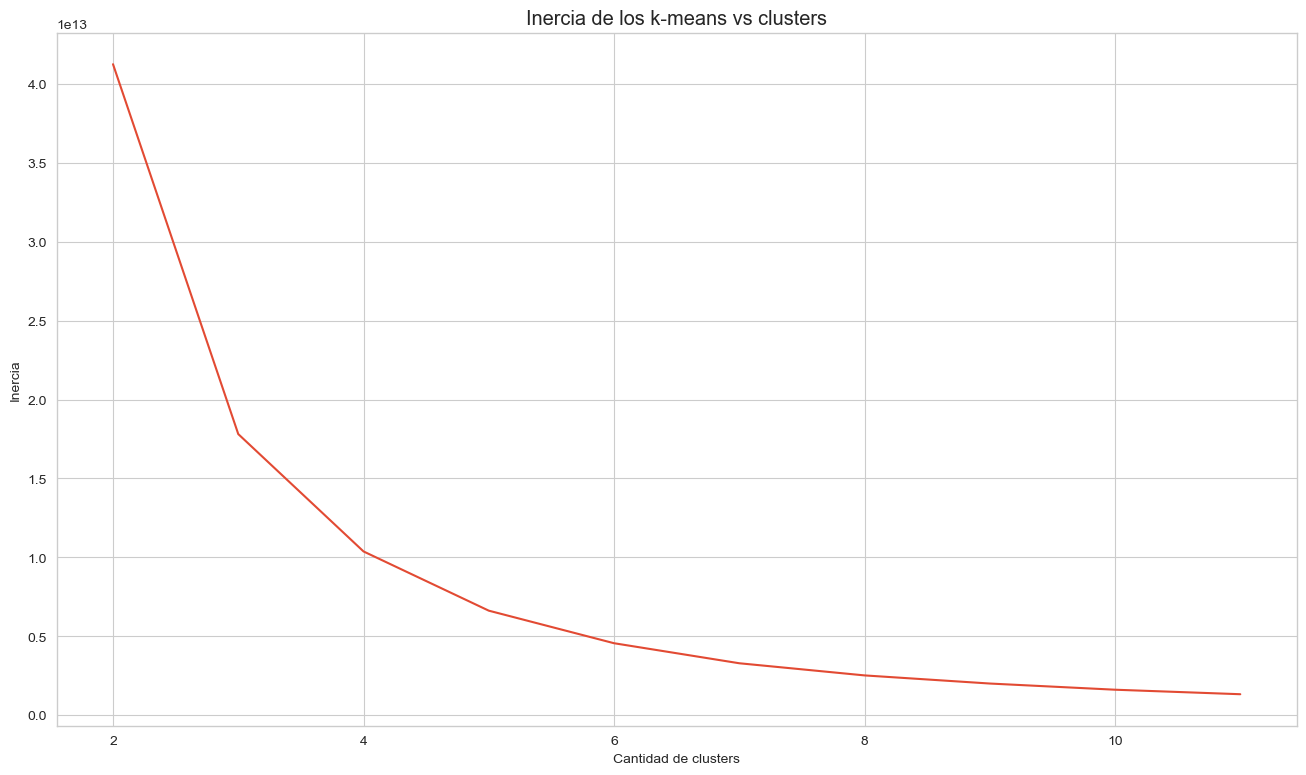

In [28]:
## Desarrollo un gráfico para ver la relación entre Kmeans vs Clusters
scores = [KMeans(n_clusters=i+2).fit(df).inertia_ for i in range(10)]
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Cantidad de clusters')
plt.ylabel("Inercia")
plt.title("Inercia de los k-means vs clusters")

labels = kmeans.predict(df)



In [ ]:
 ## Grafico Box Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)